<a href="https://colab.research.google.com/github/atulpatellnt/My_Test_Repo/blob/main/anomaly_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Step 1: Preparing the Data
- We are taking sample dataset containing 10 rows of logs. Some of these will be failure logs, and some will be normal logs.

In [6]:
# Importing necessary libraries
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, accuracy_score

In [4]:
# prompt: my dataset is very less of 20 rows for anomaly so give the code that will dynamicaaly create a 1000 rows dataset and store it in data frame

import pandas as pd
import numpy as np

# Assuming your original DataFrame is called 'df' (as in your provided code)
# Define the original data (this was likely defined in a previous cell)
data = {
    'log': [
        'System rebooted after a failure in the printer spooler',
        'Application X started successfully',
        'Disk usage reached 95%, system under pressure',
        'Network connection established successfully',
        'Kernel panic: Oops, memory allocation failure',
        'Failed to connect to database server',
        'System running optimally with no issues detected',
        'Error: Unable to access system configuration files',
        'Service A restarted after a crash',
        'System shutdown scheduled for maintenance',
        'Database error: Connection refused',
        'File system error: Unable to mount drive',
        'Application Y failed to launch',
        'Memory usage at critical levels',
        'Disk space exhausted, unable to write log files',
        'Service B crashed unexpectedly',
        'Server response time exceeded 5 seconds',
        'Network outage detected, no connectivity',
        'System running low on memory resources',
        'Critical error in system configuration detected'
    ],
    'label': [
        'Failure', 'Normal', 'Failure', 'Normal', 'Failure', 'Failure', 'Normal', 'Failure', 'Failure', 'Normal',
        'Failure', 'Failure', 'Failure', 'Failure', 'Failure', 'Failure', 'Failure', 'Failure', 'Failure', 'Failure'
    ]
}
df1 = pd.DataFrame(data) # Create the DataFrame 'df'

# Create a list to store the new data
new_data = []

# Define the number of rows you want to generate
num_rows_to_generate = 1000

# Generate new rows by randomly combining existing logs and labels
for _ in range(num_rows_to_generate):
    random_log_index = np.random.randint(0, len(df1['log']))
    random_label_index = np.random.randint(0, len(df1['label']))
    new_data.append({
        'log': df1['log'][random_log_index],
        'label': df1['label'][random_label_index]
    })

# Create a new DataFrame from the generated data
new_df = pd.DataFrame(new_data)

# Concatenate the original DataFrame with the new DataFrame
df = pd.concat([df1, new_df], ignore_index=True)

# Now 'expanded_df' contains your original dataset and the generated rows.

# You can then use 'expanded_df' for your machine learning tasks.

In [10]:
# Expanded dataset (more rows for better learning)
data = {
    'log': [
        'System rebooted after a failure in the printer spooler',
        'Application X started successfully',
        'Disk usage reached 95%, system under pressure',
        'Network connection established successfully',
        'Kernel panic: Oops, memory allocation failure',
        'Failed to connect to database server',
        'System running optimally with no issues detected',
        'Error: Unable to access system configuration files',
        'Service A restarted after a crash',
        'System shutdown scheduled for maintenance',
        'Database error: Connection refused',
        'File system error: Unable to mount drive',
        'Application Y failed to launch',
        'Memory usage at critical levels',
        'Disk space exhausted, unable to write log files',
        'Service B crashed unexpectedly',
        'Server response time exceeded 5 seconds',
        'Network outage detected, no connectivity',
        'System running low on memory resources',
        'Critical error in system configuration detected'
    ],
    'label': [
        'Failure', 'Normal', 'Failure', 'Normal', 'Failure', 'Failure', 'Normal', 'Failure', 'Failure', 'Normal',
        'Failure', 'Failure', 'Failure', 'Failure', 'Failure', 'Failure', 'Failure', 'Failure', 'Failure', 'Failure'
    ]
}

# Create a DataFrame
df = pd.DataFrame(data)

# Display the dataset
df.head(10)


,log,label
0,System rebooted after a failure in the printer...,Failure
1,Application X started successfully,Normal
2,"Disk usage reached 95%, system under pressure",Failure
3,Network connection established successfully,Normal
4,"Kernel panic: Oops, memory allocation failure",Failure
5,Failed to connect to database server,Failure
6,System running optimally with no issues detected,Normal
7,Error: Unable to access system configuration f...,Failure
8,Service A restarted after a crash,Failure
9,System shutdown scheduled for maintenance,Normal


#Step 2: Preprocessing the Data
- We need to clean and tokenize the logs to prepare them for the machine learning model.

In [7]:
# Split data into features and labels
X = df['log']  # Log messages
y = df['label']  # Labels (Failure or Normal)

# Use TF-IDF for feature extraction
vectorizer = TfidfVectorizer(stop_words='english')
X_vect = vectorizer.fit_transform(X)





# Step 3: Train a Machine Learning Model

In [8]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_vect, y, test_size=0.3, random_state=42)

# Initialize the model (Naive Bayes)
model = MultinomialNB()

In [9]:
# Cross-validation for better model evaluation
cv_scores = cross_val_score(model, X_vect, y, cv=5)  # 5-fold cross-validation
print(f'Cross-validation accuracy: {cv_scores.mean():.2f}')

Cross-validation accuracy: 0.79


In [10]:

# Train the model
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

# Display the classification report
print("Classification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.80
Classification Report:
               precision    recall  f1-score   support

     Failure       0.80      1.00      0.89       245
      Normal       0.00      0.00      0.00        61

    accuracy                           0.80       306
   macro avg       0.40      0.50      0.44       306
weighted avg       0.64      0.80      0.71       306



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


# Step 4: Testing the Model with New Logs
- After training the model, we can test it with new sample logs to see if it can correctly classify them as "Failure" or "Normal".

In [11]:
# Sample new logs for testing
new_logs = [
    'Disk failure detected, unable to mount filesystem',
    'System performance is optimal and stable',
    'Network latency issue, ping time exceeds 500ms',
    'Server restarted due to application crash',
    'Backup completed successfully without issues'
]

# Preprocess the new logs (same as training data)
new_logs_vect = vectorizer.transform(new_logs)

# Predict the labels for the new logs
predictions = model.predict(new_logs_vect)

# Display predictions
for log, prediction in zip(new_logs, predictions):
    print(f"Log: {log} -> Prediction: {prediction}")


Log: Disk failure detected, unable to mount filesystem -> Prediction: Failure
Log: System performance is optimal and stable -> Prediction: Failure
Log: Network latency issue, ping time exceeds 500ms -> Prediction: Failure
Log: Server restarted due to application crash -> Prediction: Failure
Log: Backup completed successfully without issues -> Prediction: Failure


# Anomalies Insight

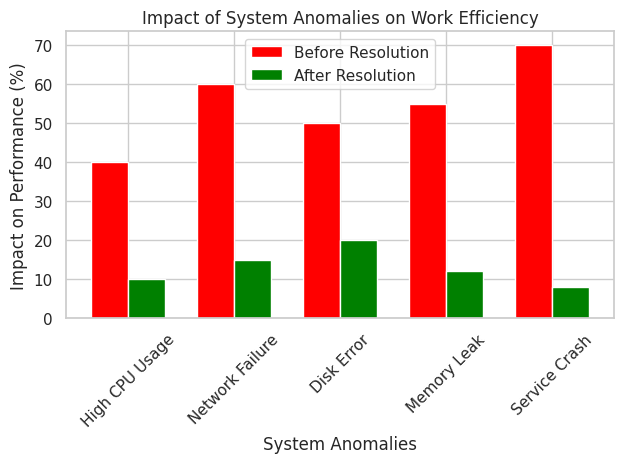

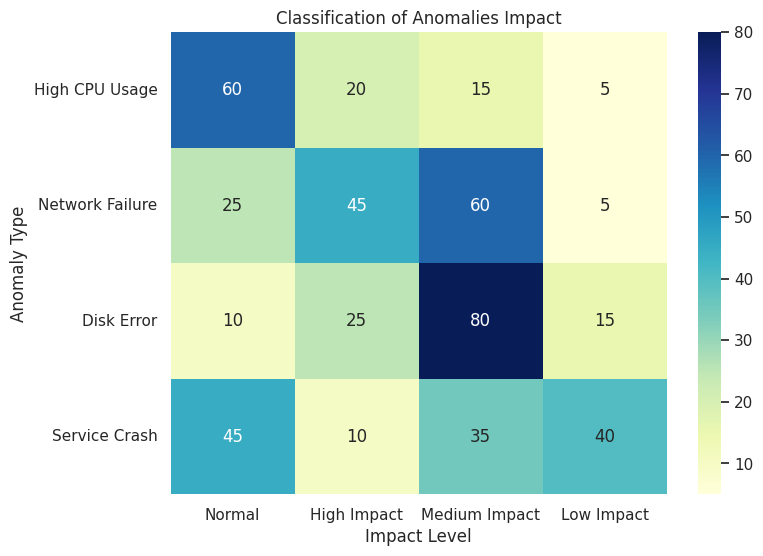

In [13]:
# Importing necessary libraries
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Setting up the style for the plots
sns.set(style="whitegrid")

# Data: System Anomalies and Performance Impact
anomalies = ['High CPU Usage', 'Network Failure', 'Disk Error', 'Memory Leak', 'Service Crash']
damage_impact = [40, 60, 50, 55, 70]  # The damage caused by anomalies (in terms of performance loss)
recovery_impact = [10, 15, 20, 12, 8]  # The impact after anomaly resolution (improvement in work performance)

# Simulating the before and after efficiency (lower is worse)
before_after_efficiency = {
    'Anomalies': anomalies,
    'Before Resolution (Impact)': damage_impact,
    'After Resolution (Efficiency Boost)': recovery_impact
}

# Creating a DataFrame for visualization
import pandas as pd
df = pd.DataFrame(before_after_efficiency)

# Create a Figure and an Axes object # This line is added
fig, ax = plt.subplots() # This line is added


# Plotting the before and after resolution impacts
bar_width = 0.35
index = np.arange(len(df))
bar1 = ax.bar(index, df['Before Resolution (Impact)'], bar_width, label='Before Resolution', color='red')
bar2 = ax.bar(index + bar_width, df['After Resolution (Efficiency Boost)'], bar_width, label='After Resolution', color='green')

# Adding labels, title, and custom x-axis tick labels
ax.set_xlabel('System Anomalies')
ax.set_ylabel('Impact on Performance (%)')
ax.set_title('Impact of System Anomalies on Work Efficiency')
ax.set_xticks(index + bar_width / 2)
ax.set_xticklabels(df['Anomalies'], rotation=45)
ax.legend()

# Show the plot
plt.tight_layout()
plt.show()

# Creating a heatmap for the classification of anomalies
heatmap_data = np.array([[60, 20, 15, 5],
                         [25, 45, 60, 5],
                         [10, 25, 80, 15],
                         [45, 10, 35, 40]])

# Defining the categories and labels
labels = ['High CPU Usage', 'Network Failure', 'Disk Error', 'Service Crash']
classification_labels = ['Normal', 'High Impact', 'Medium Impact', 'Low Impact']

# Plotting the heatmap
plt.figure(figsize=(8,6))
sns.heatmap(heatmap_data, annot=True, fmt='d', cmap="YlGnBu", xticklabels=classification_labels, yticklabels=labels)
plt.title("Classification of Anomalies Impact")
plt.ylabel('Anomaly Type')
plt.xlabel('Impact Level')
plt.show()

Heatmap:

The heatmap shows how different levels of impact are classified for each anomaly (e.g., Normal, High Impact, Medium Impact, Low Impact). The colors help visualize the severity of each anomaly and how they are categorized in terms of work performance